In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


In [ ]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long','fM3Trans', 'fAlpha', 'fDist','class']
df = pd.read_csv("magic04.data", names = cols)
#Returns first five data entries from dataframe
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
#Converts 'g' to int (0 or 1)
df['class'] = (df['class'] == 'g').astype(int)

In [ ]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


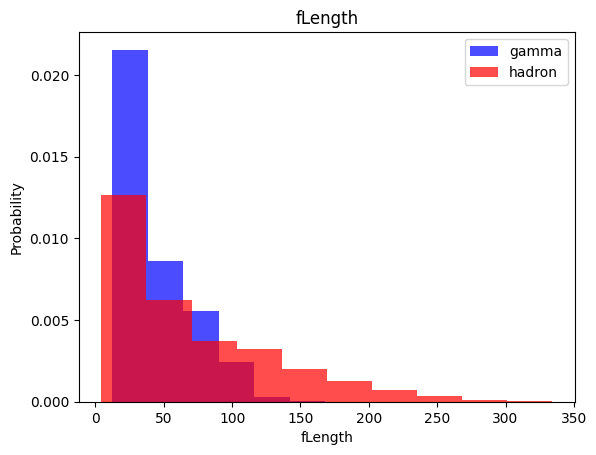

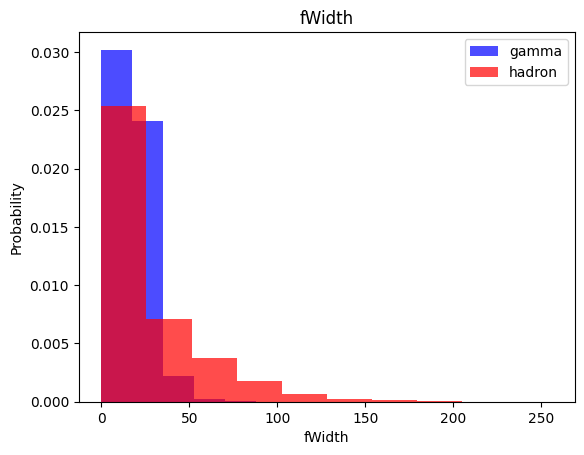

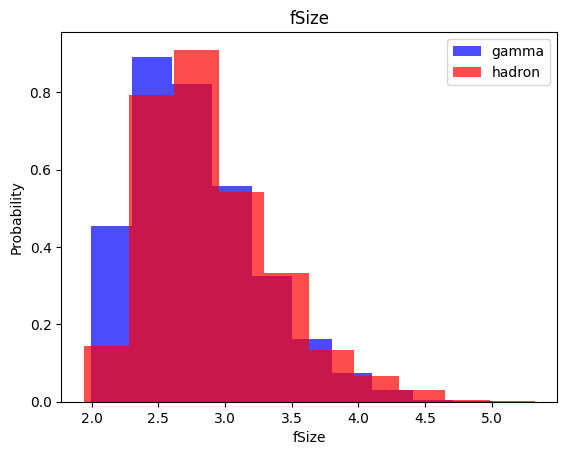

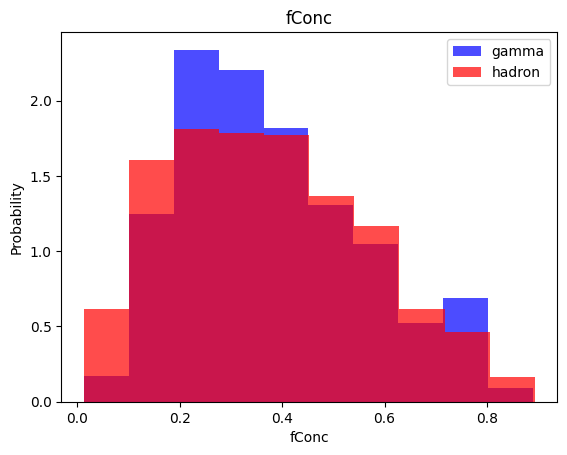

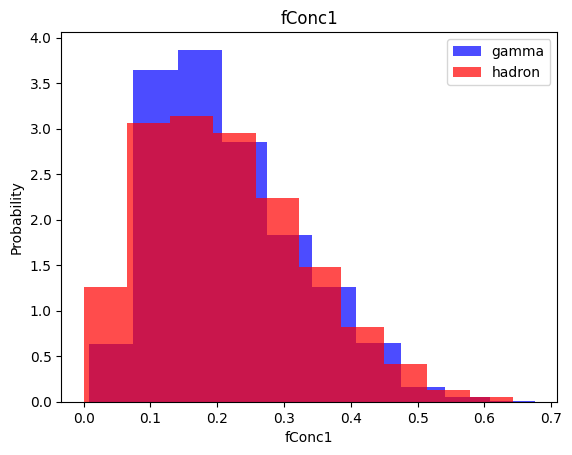

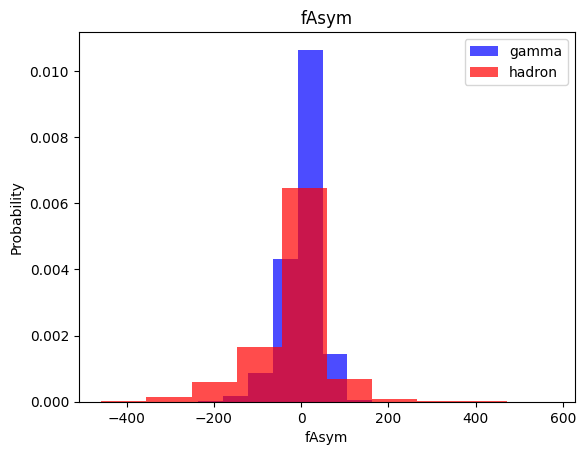

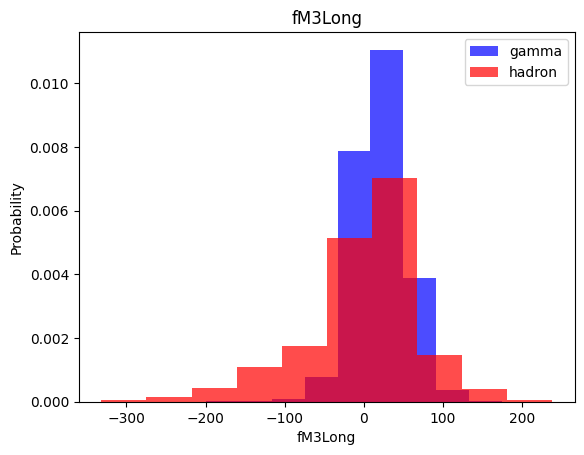

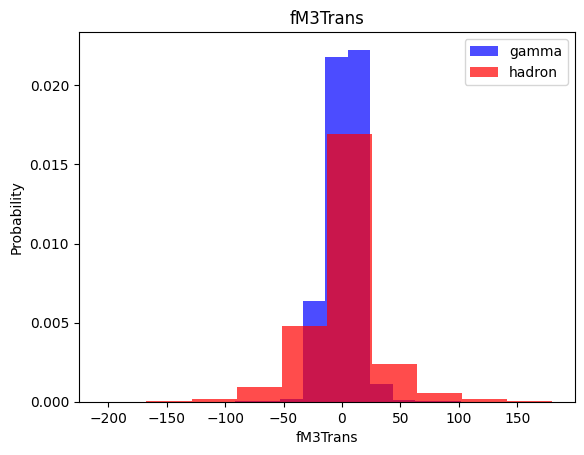

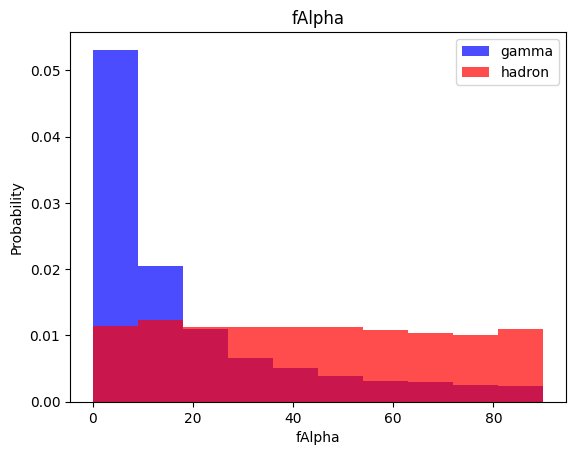

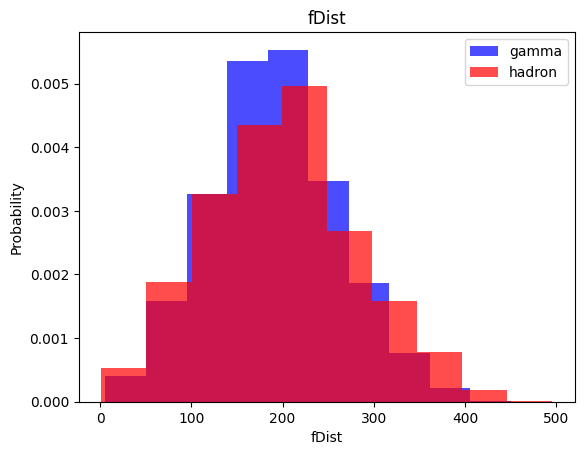

In [ ]:
# take every feature apart from class up to last item
for label in cols[:-1]:

  #Only plot gammas, density normalises the data over available samples
  plt.hist(df[df['class']==1][label],color = 'blue',label = 'gamma', alpha = 0.7, density = True)
  #Only plot hadrons
  plt.hist(df[df['class']==0][label],color = 'red',label = 'hadron', alpha = 0.7, density = True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
  #Train, validation and test datasets
  #shuffle data (sample), splits data into train 60%, validate 20% & test 20%
  train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
#Scale dataset function
def scale_dataset(dataframe, oversample = False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

#standardizes features by removing the mean and scaling to unit variance
  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x,y =ros.fit_resample(x,y)

#horizontally stack data
  data = np.hstack((x,np.reshape(y, (-1,1))))

  return data, x, y


In [ ]:
#oversample to make hadron ~ gamma (match class sizes)
#print(len(train[train['class']==1])) #gamma
#print(len(train[train['class']==0])) #hadron

train, x_train, y_train = scale_dataset(train, oversample = True)
valid, x_valid, y_valid = scale_dataset(valid, oversample = True)
test, x_test, y_test = scale_dataset(test, oversample = False)

In [ ]:
#equal training class sizes
#sum(y_train == 1)
#sum(y_train == 1)

**kNN**

In [ ]:
#k-nearest neighbours (take same label of nearest data using euclidean distance)
#k tells
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train,  y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
 #y_pred

In [ ]:
#y_test

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.67      0.72      1336
           1       0.84      0.90      0.87      2468

    accuracy                           0.82      3804
   macro avg       0.81      0.79      0.80      3804
weighted avg       0.82      0.82      0.82      3804



SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(x_train,y_train)

In [ ]:
y_pred =svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1336
           1       0.89      0.90      0.90      2468

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train,y_train)

In [ ]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.43      0.54      1336
           1       0.75      0.92      0.82      2468

    accuracy                           0.75      3804
   macro avg       0.74      0.67      0.68      3804
weighted avg       0.74      0.75      0.73      3804



**Logisitc Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train,y_train)

In [ ]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1336
           1       0.85      0.83      0.84      2468

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.78      3804
weighted avg       0.80      0.79      0.79      3804



**Neural Net**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape = (10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary Crossentropy')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
history = nn_model.fit(x_train, y_train, epochs=100, batch_size= 32, validation_split = 0.2, verbose =0)

Epoch 1/100
370/370 [==============================] - 3s 5ms/step - loss: 0.4603 - accuracy: 0.7874 - val_loss: 0.5673 - val_accuracy: 0.6741
Epoch 2/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3745 - accuracy: 0.8412 - val_loss: 0.5613 - val_accuracy: 0.7039
Epoch 3/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3534 - accuracy: 0.8509 - val_loss: 0.4806 - val_accuracy: 0.7552
Epoch 4/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3442 - accuracy: 0.8560 - val_loss: 0.5182 - val_accuracy: 0.7336
Epoch 5/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3363 - accuracy: 0.8591 - val_loss: 0.4990 - val_accuracy: 0.7370
Epoch 6/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3304 - accuracy: 0.8607 - val_loss: 0.5177 - val_accuracy: 0.7295
Epoch 7/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3254 - accuracy: 0.8633 - val_loss: 0.4431 - val_accuracy: 0.7559

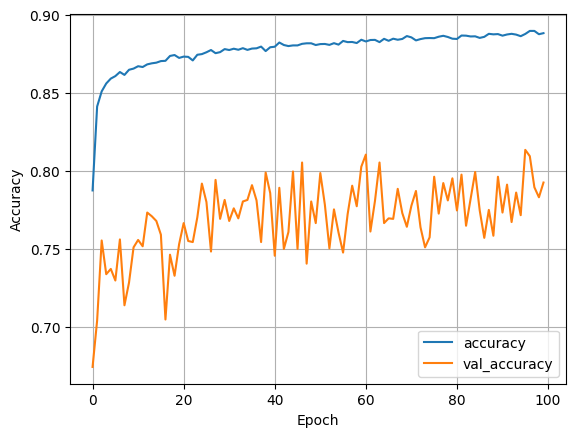

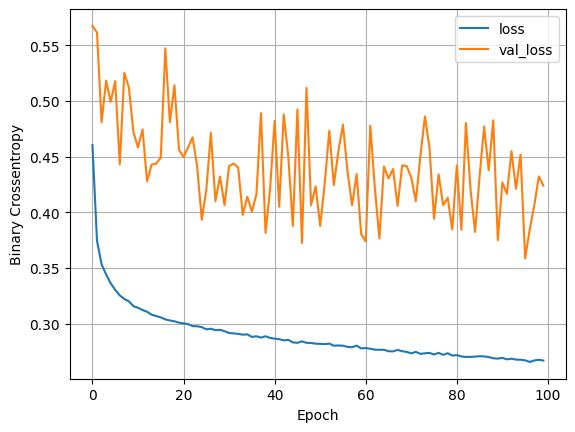

In [ ]:
plot_accuracy(history)
plot_loss(history)